# Bibliotecas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from datetime import datetime, time

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-23 12:04:22


# Funções Auxiliares

In [4]:
def get_dados(path, numero_frutas):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    classes = []
    fruta_num = 0
    passo = len(lista_dir)/numero_frutas
    for idx, fruta in enumerate(lista_dir):
        if (idx % passo != 0):
            continue
        lista_img = os.listdir(f"{path}/{fruta}")
        classes.append(fruta)
        print(f"{fruta_num} - {idx} - {fruta} - {len(lista_img)}")
        for img in lista_img:
            arquivo = f"{path}/{fruta}/{img}"
            img_fruta = img_to_array(load_img(arquivo, target_size=(32, 32)))
            X.append(img_fruta)
            Y.append(fruta_num)
        fruta_num = fruta_num + 1    
    return (X, Y, classes)

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Carregando os dados 

In [5]:
# número de frutas a serem usadas neste notebook
num_frutas = 120

In [6]:
# diretórios das imagens
path_treino = './data/frutas/Training' 
path_teste = './data/frutas/Test'

In [7]:
# carregando as imagens com tamanho 32x32 (para a LENET5) e os labels em memória
X_frutas, Y_frutas, frutas_labels = get_dados(path_treino, num_frutas)

0 - 0 - Apple Braeburn - 492
1 - 1 - Apple Crimson Snow - 444
2 - 2 - Apple Golden 1 - 492
3 - 3 - Apple Golden 2 - 492
4 - 4 - Apple Golden 3 - 481
5 - 5 - Apple Granny Smith - 492
6 - 6 - Apple Pink Lady - 456
7 - 7 - Apple Red 1 - 492
8 - 8 - Apple Red 2 - 492
9 - 9 - Apple Red 3 - 429
10 - 10 - Apple Red Delicious - 490
11 - 11 - Apple Red Yellow 1 - 492
12 - 12 - Apple Red Yellow 2 - 672
13 - 13 - Apricot - 492
14 - 14 - Avocado - 427
15 - 15 - Avocado ripe - 491
16 - 16 - Banana - 490
17 - 17 - Banana Lady Finger - 450
18 - 18 - Banana Red - 490
19 - 19 - Beetroot - 450
20 - 20 - Blueberry - 462
21 - 21 - Cactus fruit - 490
22 - 22 - Cantaloupe 1 - 492
23 - 23 - Cantaloupe 2 - 492
24 - 24 - Carambula - 490
25 - 25 - Cauliflower - 702
26 - 26 - Cherry 1 - 492
27 - 27 - Cherry 2 - 738
28 - 28 - Cherry Rainier - 738
29 - 29 - Cherry Wax Black - 492
30 - 30 - Cherry Wax Red - 492
31 - 31 - Cherry Wax Yellow - 492
32 - 32 - Chestnut - 450
33 - 33 - Clementine - 490
34 - 34 - Cocos - 4

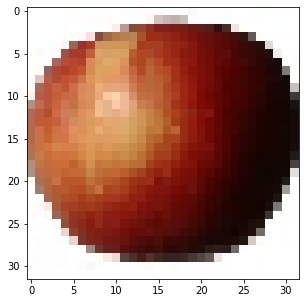

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(array_to_img(X_frutas[0]))

In [9]:
Y_frutas[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Temos uma distribuição quase uniforme das respostas.

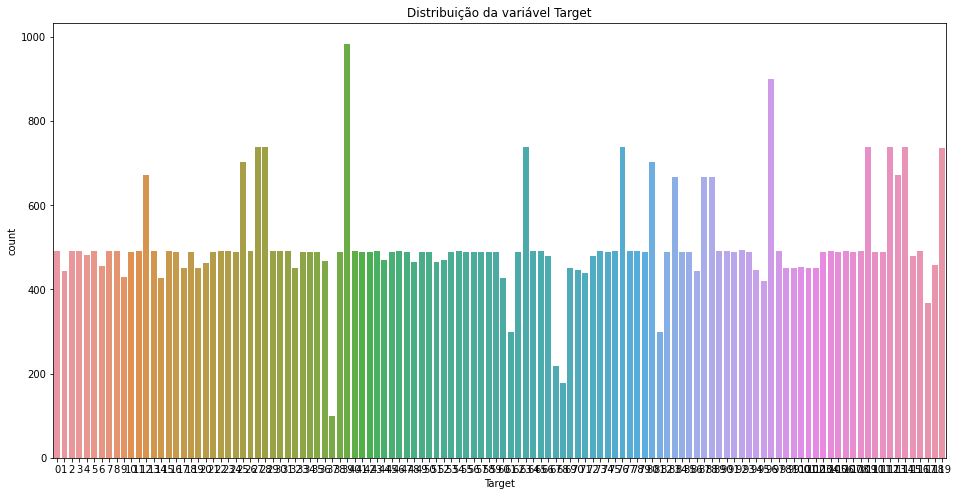

In [10]:
fig = plt.figure(figsize=(16,8))
sns.countplot(x = Y_frutas)
plt.title('Distribuição da variável Target')
plt.xlabel('Target')
plt.xticks()
plt.show()

In [11]:
len(X_frutas)

60498

In [12]:
len(Y_frutas)

60498

In [13]:
X = np.asarray(X_frutas).astype(np.float32)
Y = np.asarray(Y_frutas)

## Padronizando os dados, que estão entre 0 e 255, dividindo por 255.
### Dados padronizados entre 0 e 1.

In [14]:
X = X/255
X.shape

(60498, 32, 32, 3)

## Transformando a variável resposta em "One-hot vector" para utilizá-la no modelo de MLP

In [15]:
Y = to_categorical(Y, num_frutas)
Y.shape

(60498, 120)

In [16]:
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

## Dividindo a Base de Dados de treino entre treino e validação, com 20% para a validação.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modelo de MLP

## Criando o modelo Lenet5 padrão com a função de ativação "relu"

In [18]:
# Cria o modelo
model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 3), activation='relu'))   
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(16, (5, 5), activation='relu'))   
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(num_frutas, activation='softmax'))
#model.summary()

In [24]:
#plot_model(model, show_shapes=True, show_layer_names=True)

## Compilando e treinando o modelo. 
### Vamos utilizar a função de Callback ModelCheckPointer para salvar o modelo com a melhor accuracia na base de validação.

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex8_2.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy')

history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, batch_size=32, callbacks=[checkpointer], verbose=0)

## Gráfico comparativo da Acurácia e Perda no treinamento

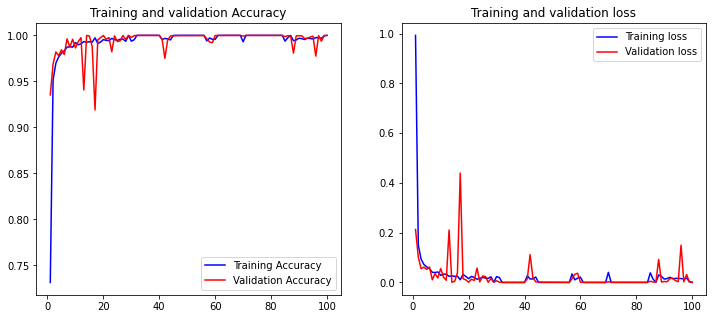

In [20]:
plot_history(history)

## Apresentando a Acurácia final do Treino, carregando o melhor modelo salvo e apresentando a Acurácia da Validação

In [21]:
scores = model.evaluate(X_train, y_train)
print()
print(f"Acuracia do Treino: {round(scores[1]*100,2)}%")

1513/1513 [==============================] - 3s 2ms/step - loss: 2.3762e-06 - accuracy: 1.0000

Acuracia do Treino: 100.0%


In [22]:
model = load_model("./modelo_mlp_ex8_2.hdf5")

In [23]:
scores = model.evaluate(X_val, y_val)
print()
print(f"Acuracia da Validação: {round(scores[1]*100,2)}%")

379/379 [==============================] - 1s 2ms/step - loss: 2.3677e-04 - accuracy: 0.9999

Acuracia da Validação: 99.99%


## Carregando os dados para o Teste e aplicando os mesmos pré processamentos

In [24]:
X_frutas, Y_frutas, frutas_labels = get_dados(path_teste, num_frutas)

0 - 0 - Apple Braeburn - 164
1 - 1 - Apple Crimson Snow - 148
2 - 2 - Apple Golden 1 - 164
3 - 3 - Apple Golden 2 - 164
4 - 4 - Apple Golden 3 - 161
5 - 5 - Apple Granny Smith - 164
6 - 6 - Apple Pink Lady - 152
7 - 7 - Apple Red 1 - 164
8 - 8 - Apple Red 2 - 164
9 - 9 - Apple Red 3 - 144
10 - 10 - Apple Red Delicious - 166
11 - 11 - Apple Red Yellow 1 - 164
12 - 12 - Apple Red Yellow 2 - 219
13 - 13 - Apricot - 164
14 - 14 - Avocado - 143
15 - 15 - Avocado ripe - 166
16 - 16 - Banana - 166
17 - 17 - Banana Lady Finger - 152
18 - 18 - Banana Red - 166
19 - 19 - Beetroot - 150
20 - 20 - Blueberry - 154
21 - 21 - Cactus fruit - 166
22 - 22 - Cantaloupe 1 - 164
23 - 23 - Cantaloupe 2 - 164
24 - 24 - Carambula - 166
25 - 25 - Cauliflower - 234
26 - 26 - Cherry 1 - 164
27 - 27 - Cherry 2 - 246
28 - 28 - Cherry Rainier - 246
29 - 29 - Cherry Wax Black - 164
30 - 30 - Cherry Wax Red - 164
31 - 31 - Cherry Wax Yellow - 164
32 - 32 - Chestnut - 153
33 - 33 - Clementine - 166
34 - 34 - Cocos - 1

In [25]:
X_test = np.asarray(X_frutas).astype(np.float32)
y_test = np.asarray(Y_frutas)

In [26]:
X_test = X_test/255
y_test = to_categorical(y_test, num_frutas)

In [27]:
X_test.shape

(20622, 32, 32, 3)

In [28]:
y_test.shape

(20622, 120)

## Apresentando a Acurácia do Teste

In [29]:
scores = model.evaluate(X_test, y_test)
print()
print(f"Acuracia do Teste: {round(scores[1]*100,2)}%")

645/645 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.9675

Acuracia do Teste: 96.75%


## Conseguimos um resultado de mais de 95% no teste usando uma LENET5 padrão. Além de um treinamento muito rápido.

## Demostração aleatória de algumas previsões do modelo. 
### Verde = previsão correta
### Vermelho = previsão errada

In [30]:
y_hat = model.predict(X_test)

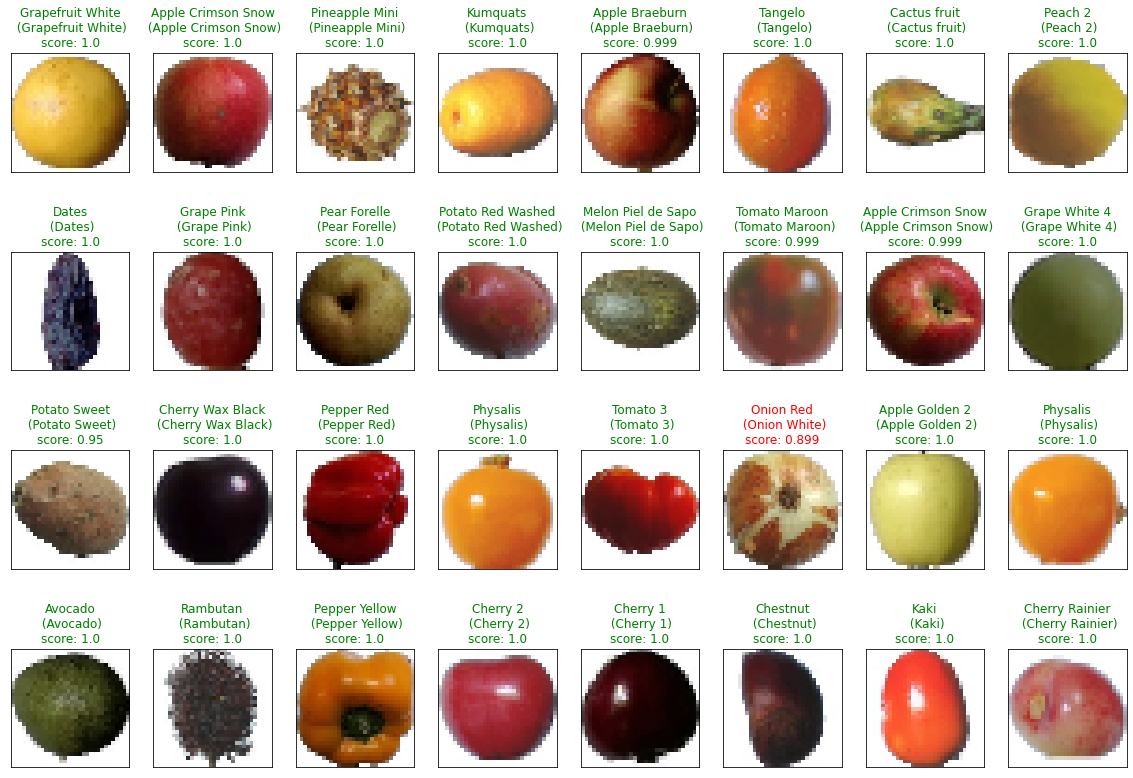

In [33]:
fig = plt.figure(figsize=(20, 14))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    pred_proba = y_hat[idx][pred_idx]
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{}\n ({})\nscore: {:.3}".format(frutas_labels[pred_idx], frutas_labels[true_idx], pred_proba),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho


In [33]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Fim Execução : 
2021-07-19 18:29:09
